In [37]:
# <--- IMPORTAÇÃO DAS BIBLIOTECAS
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix
# --->

In [38]:
# <--- IMPORTAÇÃO DA BASE DE DADOS
dados = pd.read_csv(r'C:\Projetos Data Science\Câncer_de_Mama_Wisconsin_(Diagnóstico)\data\data.csv')
# --->

In [39]:
# <--- EDA: EXPLORATORY DATA ANALYSIS ( ANÁLISE EXPLORATÓRIA DE DADOS)
#       Exploração da base de dados em busca de explorar detalhes ocultos na estrutura dos dados, 
#       identificar falhas ou comportamentos anormais, descobrir tendências e variáveis relevantes 
#       no conjunto e determinar a modelagem formal a ser utilizada.

In [40]:
# DIMENSÃO DOS DADOS
dados.shape

(569, 33)

In [41]:
# VISUALIZAÇÃO DOS DADOS
dados.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [42]:
# Em uma primeria análise podermos ver que existe uma coluna (Unnamed: 32) onde existe alguns
# dados faltantes, vamos continuar a análise para que tenhamos uma análise mais aprofundada.

In [43]:
# Nº DE CÂNCERES BENIGINOS E MALIGINOS
n_benigino = len(dados[dados.diagnosis == 'B'])
n_maligino = len(dados[dados.diagnosis == 'M'])
print('Nº de Diagnósticos de Câncer Benigino:', n_benigino)
print('Nº de Diagnósticos de Câncer Maliginos:', n_maligino)

Nº de Diagnósticos de Câncer Benigino: 357
Nº de Diagnósticos de Câncer Maliginos: 212


In [44]:
# NOMES DAS COLUNAS
dados.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [45]:
# ESTATISTICAS DA BASE DE DADOS
dados.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [46]:
# INFORMAÇÕES SOBRE TIPO DE DADOS, QTD DE DADOS, DADOS NULOS, PRESENTES NA BASE DE DADOS
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [47]:
# VERIFICAÇÃO DE DUPLICATAS
dados[dados.duplicated(['id'],keep=False)]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32


In [48]:
# ANÁLISE DE DADOS NULOS
dados_nulos = pd.DataFrame(dados.isnull().sum(), columns=['Dados Nulos'])
dados_nulos.loc[dados_nulos['Dados Nulos'] > 50]

,Dados Nulos
Unnamed: 32,569


In [49]:
# Como mostrado anteriormente, podemos analizar que exite uma coluna com todos os dados 
# faltantes (Unnamed: 32). Posteriormente iremos remove-lá, pois ela atrapalhará nosso
# modelo.

In [50]:
# FUNÇÃO DESENVOLVIDA POR MIM PARA ANÁLISAR A DISTRIBUIÇÃO DOS DADOS DE TODA BASE
def DataVisualization(data):
    from math import ceil
    import matplotlib.pyplot as plt
    import seaborn as sns
    columns = 3
    lines = ceil((len(data.columns))/3)
    fig, ax = plt.subplots(figsize=(20, lines*6))
    plt.subplots_adjust(hspace=0.50, wspace=0.15)

    for i in range(len(data.columns)):
        if type(data[data.columns[i]][0]) != str and data[data.columns[i]].nunique() > 2:
            plt.subplot(lines, columns, i+1)
            plt.title((data.columns[i]).upper(), pad=5, size=15, fontdict={'weight': 'bold'})
            plt.hist(data[data.columns[i]])
            plt.yticks(size=15)
        elif type(data[data.columns[i]][0]) == str:
            plt.subplot(lines, columns, i+1)
            plt.title((data.columns[i]).upper(), pad=5, size=15, fontdict={'weight': 'bold'})
            sns.countplot(x=data[data.columns[i]])
            plt.yticks(size=15)
            if data[data.columns[i]].nunique() >= 18:
                plt.xticks(rotation=90, ha='right')
            elif data[data.columns[i]].nunique() >= 10:
                plt.xticks(rotation=30, ha='right')
            elif data[data.columns[i]].nunique() >= 5:
                plt.xticks(rotation=20, ha='right')

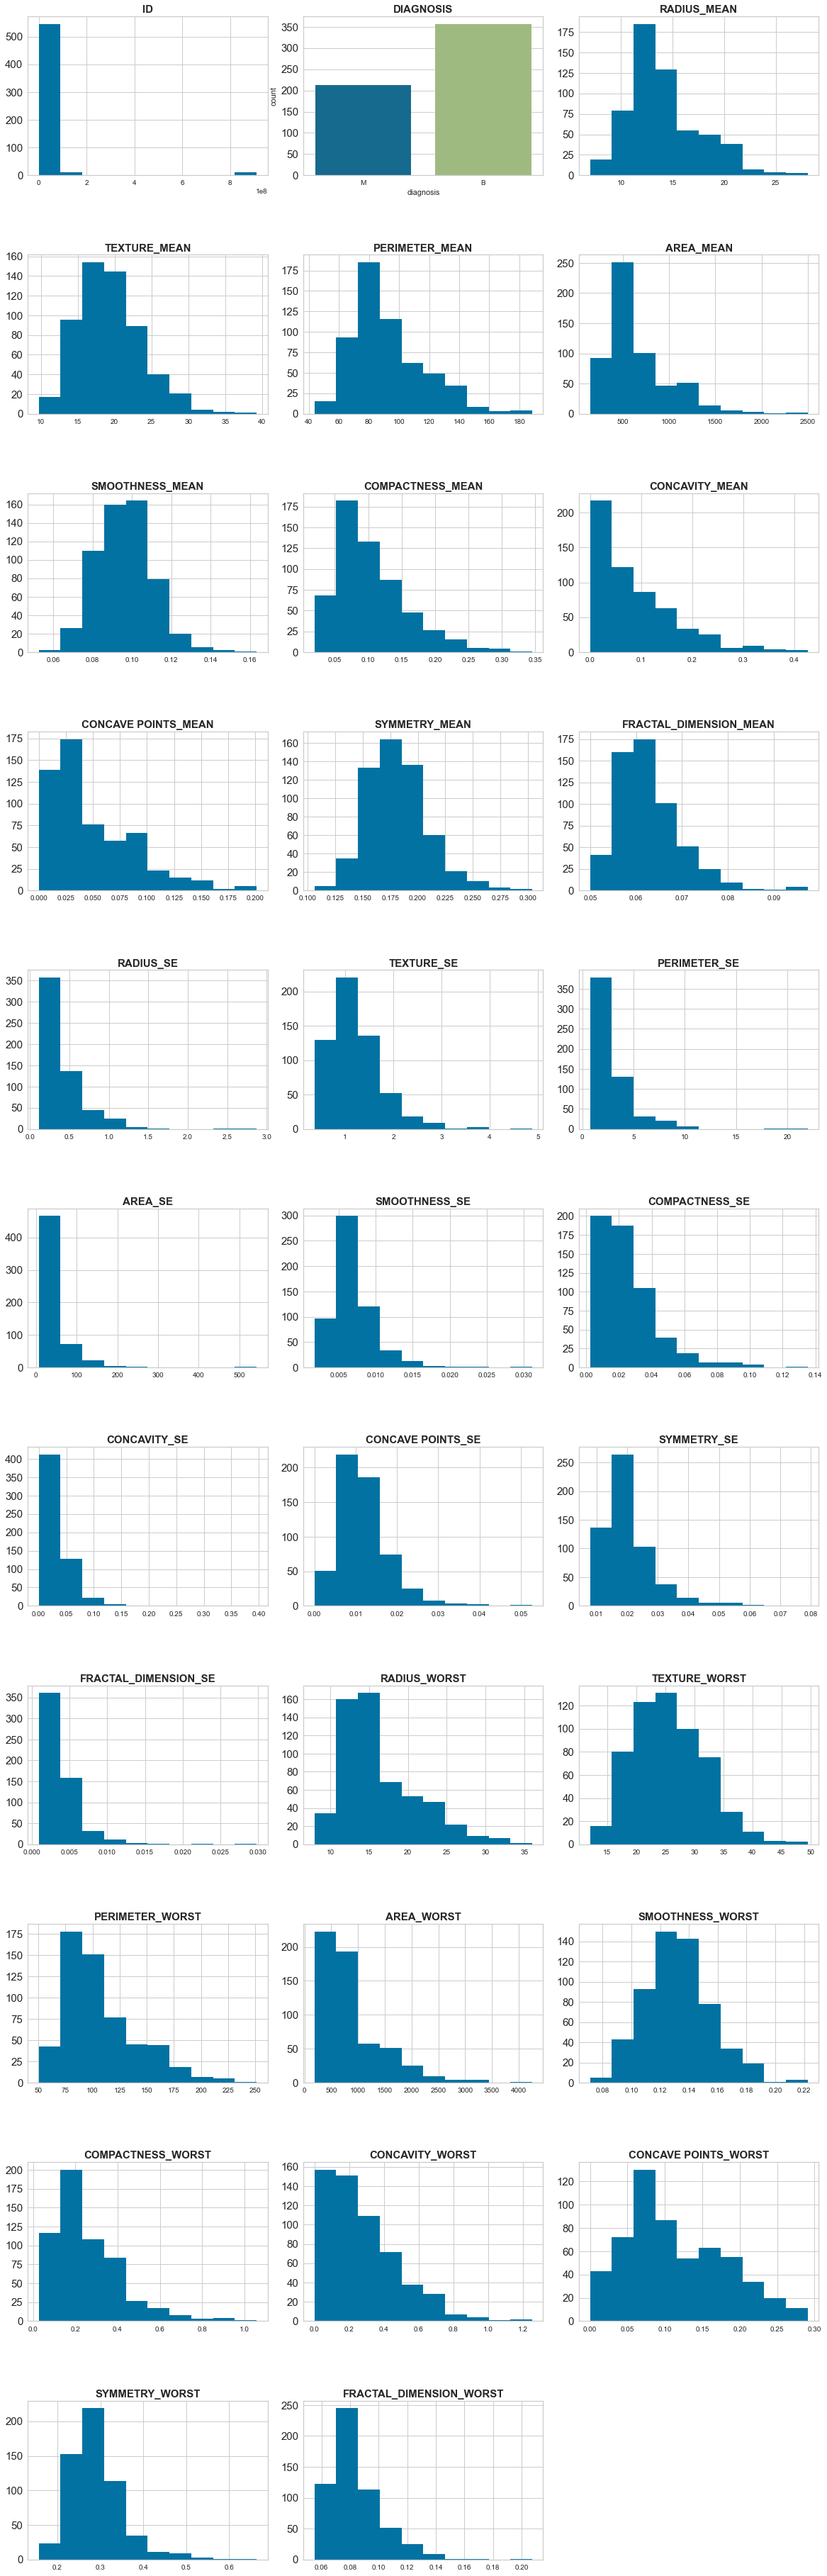

In [51]:
# VISUALIZAÇÃO DA DISTRIBUIÇÃO DOS DADOS
DataVisualization(dados)

In [52]:
# Podemos ver que a maioria dos nossos dados tende a serem normalmente destribuidos.
# Vemos também que o número de M (M = Maligno) e quase metade do número de B (B = Benigno)
#
# --->

In [53]:
# <--- LIMPEZA E TRATAMENTO DA BASE DE DADOS
#       Momento que limpamos as colunas que contem varios dados nulos, tratamos as colunas 
#       que contem dado faltantes e concertamos as anomalias para fazer o treinamento do modelo.

In [54]:
# REMOÇÃO DAS COLUNAS QUE TEM MUITOS DADOS FALTANTES
dados = dados.drop(['Unnamed: 32'], axis=1)

In [55]:
# REMOÇÃO DAS COLUNA ID (NÃO TEM SERVENTIA PARA O MODELO)
dados = dados.drop(['id'], axis=1)

In [56]:
# CHECANDO SE AINDA EXISTE DADOS NULOS NOVAMENTE
dados_nulos = pd.DataFrame(dados.isnull().sum(), columns=['Dados Nulos'])
dados_nulos.loc[dados_nulos['Dados Nulos'] > 0]

,Dados Nulos


In [57]:
# Todos os Dados nulos foram removidos da nossa base de dados
#
# --->

In [58]:
# <--- SEPARAÇÃO ENTRE PREVISORES E CLASSE
#       Preparação dos dados para efetuar o treinamento do modelo

In [59]:
# ESTRATIFICANDO A AMOSTRA
diag_benigino = np.array(np.random.choice(dados[dados.diagnosis == 'B'].index, len(dados[dados.diagnosis == 'M']), replace=False))
diag_maligino = np.array(dados[dados.diagnosis == 'M'].index)
amostra_indice = np.concatenate([diag_benigino, diag_maligino])
amostra = dados.iloc[amostra_indice, :] 

In [60]:
# <-- SEPARAÇÂO DOS DADOS EM PREVISORES E CLASSE (AMOSTRA)
X_amostra = amostra.iloc[:, amostra.columns != 'diagnosis'].values
y_amostra = amostra.iloc[:, amostra.columns == 'diagnosis'].values

In [61]:
labelencoder = LabelEncoder()
y_amostra = labelencoder.fit_transform(y_amostra)

c:\Projetos Data Science\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [62]:
# ESCALONAMENTO DOS ATRIBUTOS (STANDARDISATION)
scaler = StandardScaler() 
X_amostra = scaler.fit_transform(X_amostra)     

In [63]:
# Podemos Notar através da nossa visualização de dados acima que na nossa base de dados
# existem muitos outliers e as escalas entre os dados são muito grandes, por isso utilizei
# o StandardScaler() para Padronizar os nossos dados.

In [64]:
# <-- DIVIDINDO OS DADOS EM TREINO E TESTE (AMOSTRA)(70%/30%)
X_treinamento_amostra, X_teste_amostra, y_treinamento_amostra, y_teste_amostra = train_test_split(X_amostra,
                                                                                                  y_amostra,
                                                                                                  test_size=0.30,
                                                                                                  random_state=0)

In [65]:
# Os dados foram separados em Treino e Teste, para que depois possamos fazer a previsão
# utilizando a mesma base de dados.
#
# --->

In [66]:
# <--- CRIANÇÃO DO MODELO
#       Agora vamos criar o modelo para fazer a classificação dos nossos dados de treinamento
#       e, posteriormente fazer a previsão através do nossos dados teste.

In [67]:
# <-- CRIAÇÃO DO MODELO
florest = RandomForestClassifier(n_estimators= 1000)
florest.fit(X_treinamento_amostra, y_treinamento_amostra)

RandomForestClassifier(n_estimators=1000)

In [68]:
florest.estimators_[1]

DecisionTreeClassifier(max_features='sqrt', random_state=2049307994)

In [69]:
# <-- PREVISÕES ATRAVÉS DOS DADOS TESTES
previsao = florest.predict(X_teste_amostra)
previsao

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1])

In [70]:
# Nosso modelo foi treinado e testado com os dados a cima.
#
# --->

In [71]:
# <--- AVALIAÇÃO DOS ALGORITOMOS
#       Agora vamos avaliar nosso modelo e ver sua performance para que possamos
#       escolher o melhor modelo

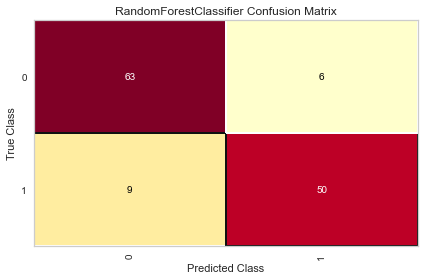

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [72]:
# VISUALIZAÇÃO DA MATRIX DE CONFUSÃO
v = ConfusionMatrix(RandomForestClassifier())
v.fit(X_treinamento_amostra, y_treinamento_amostra)
v.score(X_teste_amostra, y_teste_amostra)
v.poof()

In [73]:
# FUNÇÃO DESENVOLVIDA POR MIM PARA AVALIAÇÃO DO MODELO
def ModelEvaluation(modelo, X_teste, y_teste, predict):
    import matplotlib.pyplot as plt
    from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_curve
    acuracia = accuracy_score(y_teste, predict)
    precisao = precision_score(y_teste, predict)
    recall = recall_score(y_teste, predict)
    f1 = f1_score(y_teste, predict)
    print(f'ACURÁCIA:\t{acuracia}\nPRECISÃO:\t{precisao}\nRECALL:\t\t{recall}\nF1 SCORE:\t{f1}\n\n GRÁFICO DA CURVA DE ROC')
    modelo_prob = modelo.predict_proba(X_teste)
    probs = modelo_prob[:, 1]
    rfp, rvp, lim = roc_curve(y_teste, probs)
    plt.plot(rfp, rvp, marker='.', label=modelo,color="orange")
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('Especificidade')
    plt.ylabel('Sensibilidade')
    plt.legend()
    plt.show()

ACURÁCIA:	0.8984375
PRECISÃO:	0.9107142857142857
RECALL:		0.864406779661017
F1 SCORE:	0.8869565217391304

 GRÁFICO DA CURVA DE ROC


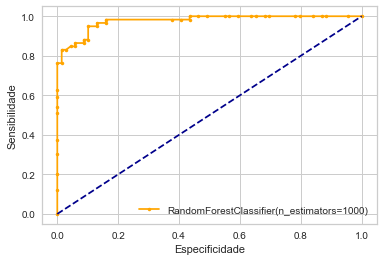

In [74]:
# VISUALIZAÇÃO DA AVALIAÇÃO DO MODELO
ModelEvaluation(florest, X_teste_amostra, y_teste_amostra, previsao)

In [ ]:
# Podemos analisar que o modelo teve um nível de acertividade muito bom e uma
# recall muito bom, que para esse modelo, nos necessitamos de poucos falsos nevativos.
# --->